In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_excel('online_retail_II.xlsx', 
                   sheet_name=['Year 2009-2010','Year 2010-2011'])

Year_2010_2011_df = df.get('Year 2010-2011')



In [2]:
Year_2010_2011_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
############################################### IDENTIFYING DUPLICATE VALS FROM NOTH SHEETS ####################################

In [4]:
duplicated_items = Year_2010_2011_df[Year_2010_2011_df.duplicated(subset = 'Customer ID')]
print(duplicated_items)


       Invoice StockCode                          Description  Quantity  \
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5       536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
1      2010-12-01 08:26:00   3.39 

In [5]:
################################################ REMOVING DUPLICATE VALS FROM NOTH SHEETS ####################################

In [6]:
################################################# REMOVING NULL VALS FROM NOTH SHEETS ######################################

In [7]:
missingvals = Year_2010_2011_df.isnull()
missingcount = missingvals.sum()
print(missingcount)

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [8]:
# total no of nulls in df sheet 2010-11
null_count=Year_2010_2011_df.isnull().sum().sum()
print(null_count)

136534


In [9]:
Year_2010_2011_df = Year_2010_2011_df.dropna()

null_count=Year_2010_2011_df.isnull().sum().sum()
print(null_count)

0


In [10]:
missingvals = Year_2010_2011_df.isnull()
missingcount = missingvals.sum()
print(missingcount)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [11]:
################################################# REMOVING NEGATIVE VALS FROM NOTH SHEETS ######################################

In [12]:
Year_2010_2011_df[Year_2010_2011_df['Price'] < 0] # checking negative vals before converting it to positive
Year_2010_2011_df['Price'] = Year_2010_2011_df['Price'].abs()
Year_2010_2011_df[Year_2010_2011_df['Price'] < 0] # checking negative vals after converting it to positive

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [13]:
Year_2010_2011_df[Year_2010_2011_df['Customer ID'] < 0] # checking negative vals before converting it to positive
Year_2010_2011_df['Customer ID'] = Year_2010_2011_df['Customer ID'].abs()
Year_2010_2011_df[Year_2010_2011_df['Customer ID'] < 0] # checking negative vals after converting it to positive

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [14]:
######################################### CHECKING for wrong format VALS FROM NOTH SHEETS ####################################

In [15]:
Year_2010_2011_df['Quantity'] = Year_2010_2011_df['Quantity'].astype(str)
is_price_string = Year_2010_2011_df['Quantity'].str.contains(r'^\$\d+\.\d{2}$')
is_price_string.sum()

0

In [16]:
try:
    pd.to_datetime(Year_2010_2011_df['InvoiceDate'], format='%Y-%m-%d')
    print('All dates are in the correct format.')
except ValueError:
    print('Some dates are not in the correct format.')

All dates are in the correct format.


In [17]:
Year_2010_2011_df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity               object
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [18]:
############################### MERGING BOTH SHEETS #################################

In [19]:
Year_2010_2011_df.describe()

,Price,Customer ID
count,406830.000000,406830.000000
mean,3.460507,15287.684160
std,69.315080,1713.603074
min,0.000000,12346.000000
25%,1.250000,13953.000000
50%,1.950000,15152.000000
75%,3.750000,16791.000000
max,38970.000000,18287.000000


In [20]:
Year_2010_2011_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
Year_2010_2011_df.tail()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [22]:

Year_2010_2011_df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity               object
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [23]:
############### MOST FREQUENT PRODUCTS PURCHASED ###################

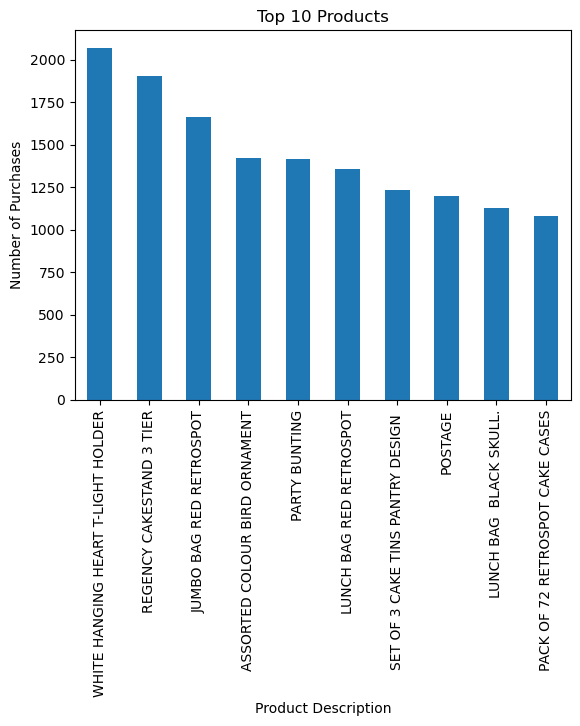

In [24]:
top10_products = Year_2010_2011_df['Description'].value_counts().head(10)

top10_products.plot(kind='bar')
plt.title('Top 10 Products')
plt.xlabel('Product Description')
plt.ylabel('Number of Purchases')
plt.show()


In [25]:
########## which products are popular at different times of year #############

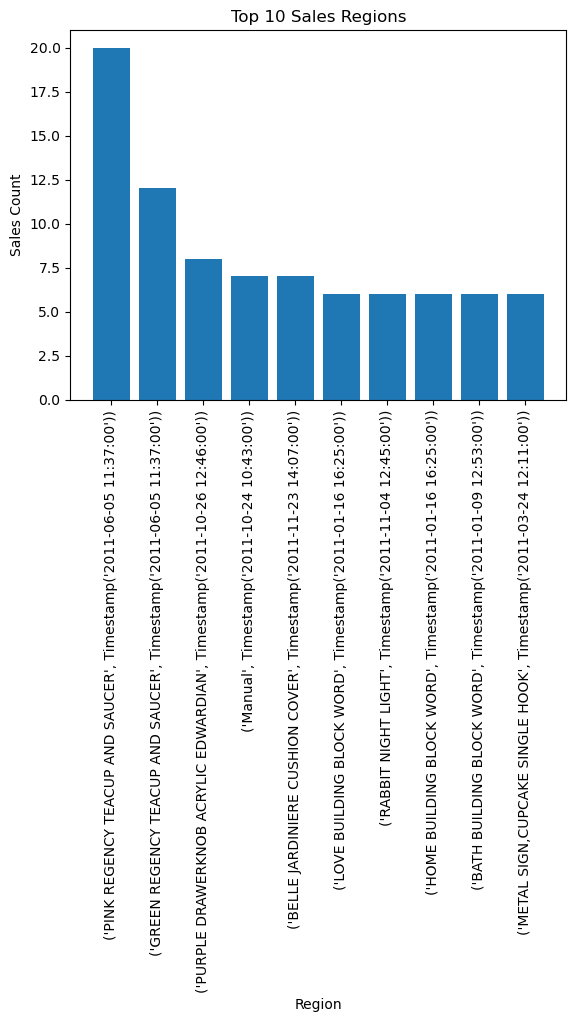

In [26]:
sales_per_region = Year_2010_2011_df.groupby(['Description', 'InvoiceDate'])['Country'].agg(['count'])
sales_per_region = sales_per_region.sort_values(by='count', ascending=False)

top_regions = sales_per_region.head(10)
plt.bar(x=[str(x) for x in top_regions.index], height=top_regions['count'])

plt.title('Top 10 Sales Regions')
plt.xlabel('Region')
plt.ylabel('Sales Count')

plt.xticks(rotation=90)

plt.show()



In [27]:
########################## which customers are most valuable to the business ###############################

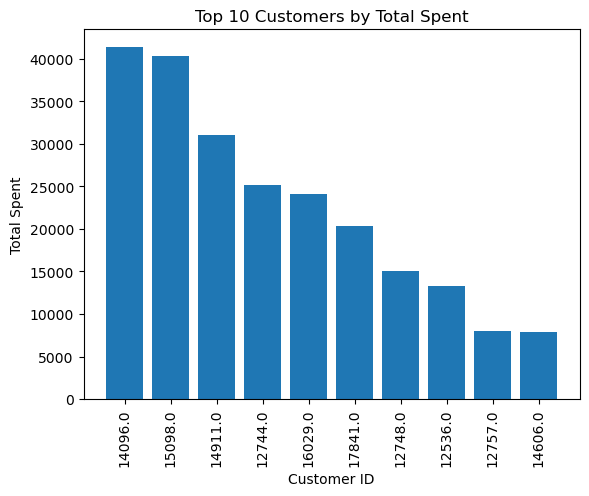

In [28]:
customer_totals = Year_2010_2011_df.groupby('Customer ID')['Price'].sum()
customer_totals = customer_totals.sort_values(ascending=False)
top_customers = customer_totals.head(10)

plt.bar(x=[str(x) for x in top_customers.index], height=top_customers.values)
plt.title('Top 10 Customers by Total Spent')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.show()
